## Computer Vision 
## Home Work 3 


### Kamal Subedi (G35111003) 

/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


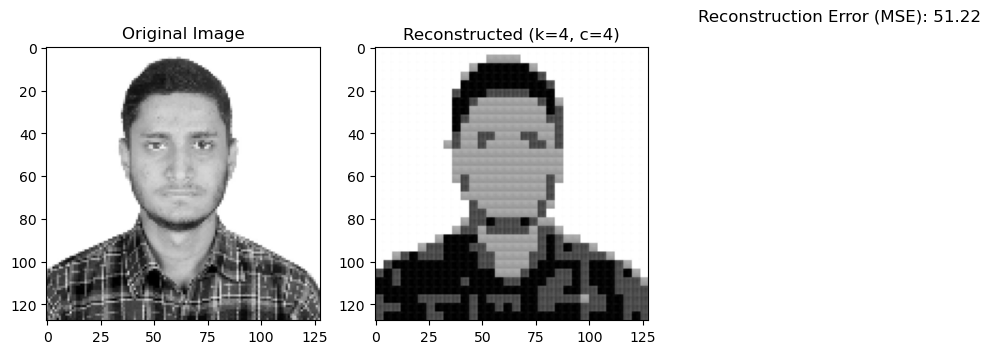

k=4, c=4 - Compression Ratio: 15.94


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


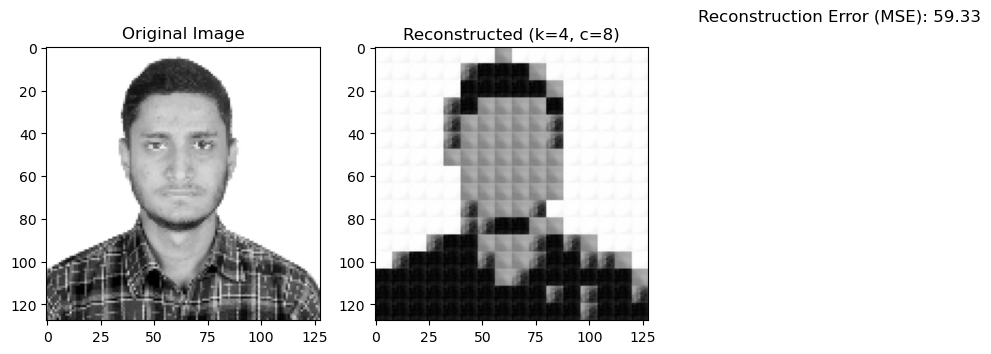

k=4, c=8 - Compression Ratio: 63.02


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


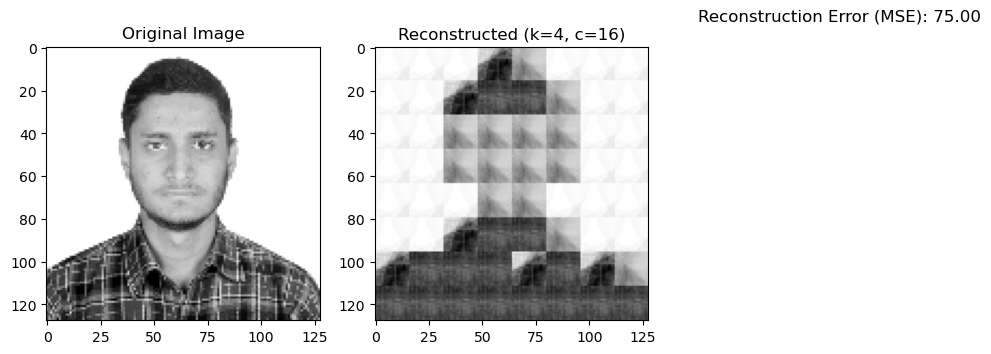

k=4, c=16 - Compression Ratio: 240.94


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


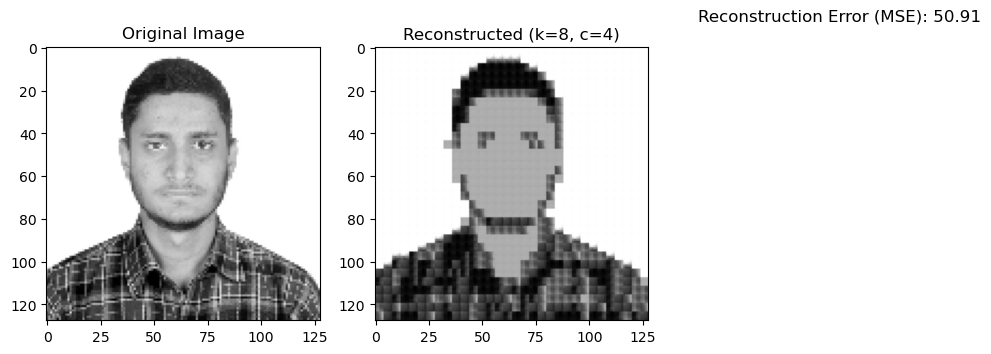

k=8, c=4 - Compression Ratio: 15.88


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


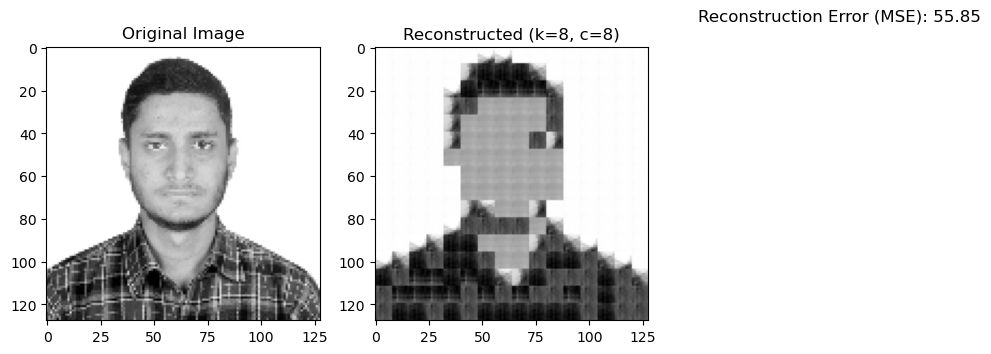

k=8, c=8 - Compression Ratio: 62.06


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


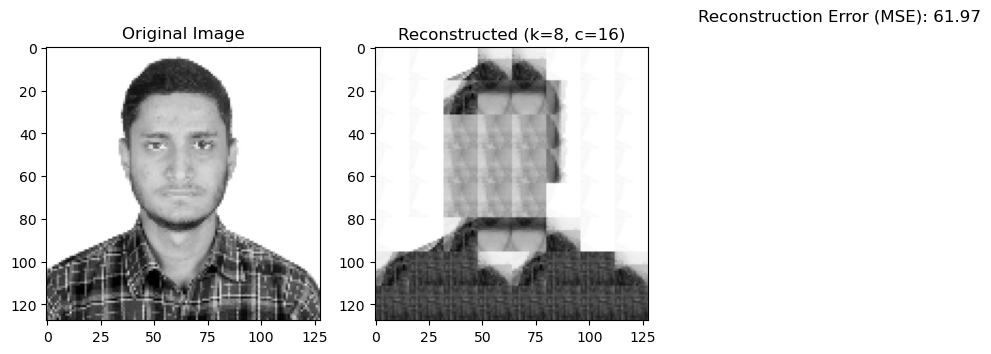

k=8, c=16 - Compression Ratio: 227.56


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


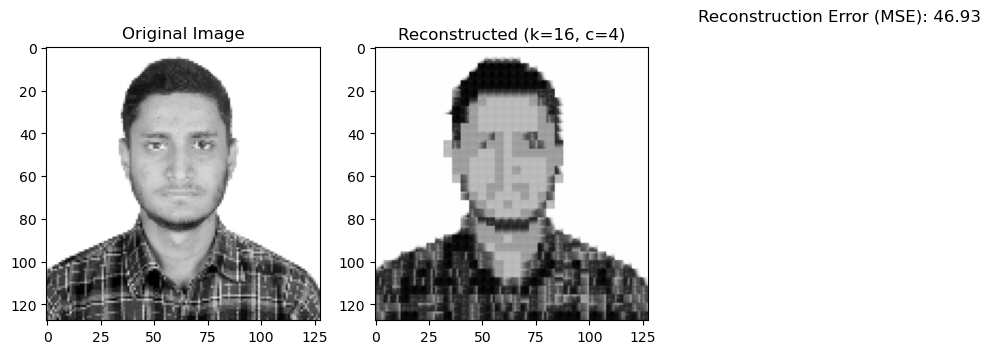

k=16, c=4 - Compression Ratio: 15.75


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


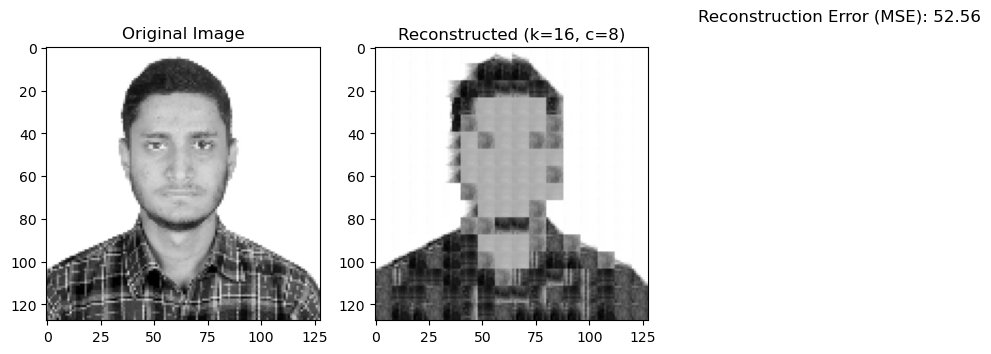

k=16, c=8 - Compression Ratio: 60.24


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


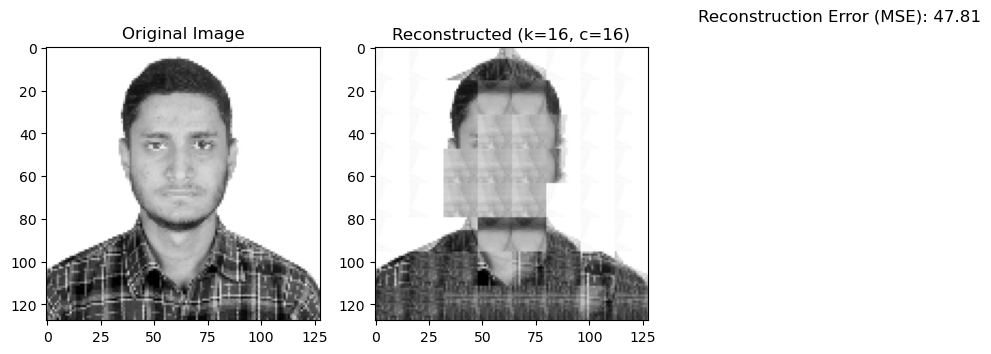

k=16, c=16 - Compression Ratio: 204.80


In [26]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_init = 15
#Load the image
image1 = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

#Image resize to 128*128
image=cv2.resize(image1, (128,128))

#Define values of k and c
k_values = [4, 8, 16]  #Few Random k values
c_values = [4, 8, 16]  #Few Random c values

for k in k_values:
    for c in c_values:
        # Divide the image into windows and flatten them
        windows = []
        indices = []
        for i in range(0, image.shape[0], c):
            for j in range(0, image.shape[1], c):
                window = image[i:i+c, j:j+c].flatten()
                index = (i, j)
                windows.append(window)
                indices.append(index)
        
        #Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=10).fit(np.array(windows))

        #Encode the image
        encoded_image = np.zeros_like(image)
        for i, label in enumerate(kmeans.labels_):
            x, y = indices[i]
            encoded_image[x:x+c, y:y+c] = kmeans.cluster_centers_[label].reshape(c, c)
        
        #Calculate the reconstruction error (MSE)
        mse = np.mean((image - encoded_image) ** 2)

        #Calculate compression ratio
        original_size = image.size
        compressed_size = k + len(indices)
        compression_ratio = original_size / compressed_size

        #Display the original and reconstructed images along with the error
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title('Original Image')
        axs[1].imshow(encoded_image, cmap='gray')
        axs[1].set_title(f'Reconstructed (k={k}, c={c})')
        axs[2].set_title(f'Reconstruction Error (MSE): {mse:.2f}')
        axs[2].axis('off')

        plt.show()
        print(f"k={k}, c={c} - Compression Ratio: {compression_ratio:.2f}")


